## Airline Review Analysis: Sentiment and Topic Modeling for Business Insights

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


This analysis addresses a critical challenge of understanding customers such as their expectations and satisfactions, and improve the airline quality to standout in the aviation industry. In this competitive landscape customer expectations are evolving continuously. Therefore, airlines must adapt to data driven, stratigic decition making to improve service quality, airline operation efficiency and custormer satisfaction.

This analysis utilize 50,000 row dataset to analyze airline performances across various cabin types (economy and business), sentiment analysis on customer reviews using VADER and TextBlob, and topic modeling using Latent Dirichlet Allocation for identifying main customer concerns regrading airlines.

This analysis present major findings in airline industry. Market leaders including Hainan Airlines, ANA All Nippon Airways, and China Southern Airlines show higher performance in various sectors by achieving average ratings above 8.0 (as detailed in Section 2: Data Exploration) and sentiment scores above 0.7 (as detailed in Section 3. Sentiment Analysis). Qantas Airways is able to maintain consistant middle tier performance with compared to top 10 airlines. This consistancy shows the opportunity to improve their services better and be a top competitor in the market.

According to the sentiment analysis Hainan Airlines appear as the sentiment leader in the airline industry with sentiment scores of 0.3094 (TextBlob) and 0.7910 (VADER). They also able to achieve 87.9% customer recommendation rate across both cabin types (business and economy) (as detailed in Section 3. Sentiment Analysis).

Topic modeling identifies main concerns and expectations of airline passengers. Top tier airlines appears to struggle with providing excellent quality services as customer expectations. Bottom tier airlines appears to struggle with basic operational issues such as baggage handling, delays, fees (as detailed in Section 4. Topic Modeling).


<a id = "cell_exploration"></a>
### 2. Data Exploration

In [ ]:
!pip install numpy==1.24.4 --only-binary :all:
!pip install pandas matplotlib seaborn
import pandas as pd
import numpy as np

df = pd.read_csv('A1_dataset.csv')

In [49]:
seed = 222588599
sample_df = df.sample(n=50000, random_state=seed)

In [50]:
print(sample_df.shape)

(50000, 17)


In [51]:
sample_df.head()

,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Title,TravelType,ValueRating,WifiRating,unique_id
57991,Spirit Airlines,Economy Class,Jun-19,0,0,1,UnitedStates,1,no,Indianapolis to Las Vegas. Horror show: worst ...,1,1,Horror show,Solo Leisure,1,0,57992
15804,Austrian Airlines,Economy Class,Oct-22,1,1,1,Croatia,1,no,The connection flight was delayed. I had 3h to...,1,3,Terrible experience,Solo Leisure,1,1,15805
28409,flydubai,Economy Class,Apr-23,0,0,1,UnitedKingdom,2,no,Booked multi stop flights through an online se...,1,1,flydubai customer review,Business,1,0,28410
13671,American Airlines,Economy Class,Apr-19,0,3,1,UnitedStates,3,no,Dallas Fort Worth to Milwaukee. My gate was ch...,2,1,rude and dismissive,Family Leisure,3,0,13672
61912,Thomas Cook Airlines,Economy Class,Jul-14,0,3,4,UnitedKingdom,6,yes,I'd never normally fly with someone like Thoma...,3,5,Thomas Cook Airlines customer review,Family Leisure,2,0,61913


Successfully loaded 50,000 reviews from the dataset. So analysis is continue using sample_df.

In [15]:
# Check the cabin types available
print("Cabin Types:", sample_df['CabinType'].unique())
print("\nCabin Type Distribution:")
print(sample_df['CabinType'].value_counts())

# Check for missing values in key columns
print("\nMissing values:")
print(sample_df[['AirlineName', 'CabinType', 'OverallScore']].isnull().sum())

Cabin Types: ['Economy Class' 'Business Class']

Cabin Type Distribution:
CabinType
Economy Class     43330
Business Class     6670
Name: count, dtype: int64

Missing values:
AirlineName     0
CabinType       0
OverallScore    0
dtype: int64


There are only two cabin types in the dataset which are economy class and business class. 
There are no missing values in AirlineName, CabinType and OverallScore columns.

In [16]:
# Group by airline and cabin type, calculate mean overall score
airline_cabin_ratings = (
    sample_df.groupby(['AirlineName', 'CabinType'])['OverallScore']
             .agg(['mean', 'count'])
             .reset_index()
)

airline_cabin_ratings.columns = ['AirlineName', 'CabinType', 'AvgOverallScore', 'ReviewCount']

# Filter airlines with at least 5 reviews per cabin type for reliability
airline_cabin_ratings = airline_cabin_ratings[airline_cabin_ratings['ReviewCount'] >= 5]

def get_top_airlines_by_cabin(df, n=10):
    top_airlines = {}
    cabin_types = df['CabinType'].unique()
    
    for cabin in cabin_types:
        cabin_data = df[df['CabinType'] == cabin].nlargest(n, 'AvgOverallScore')
        top_airlines[cabin] = cabin_data.reset_index(drop=True)
    
    return top_airlines

# Get top 10 airlines for each cabin type
top_10_by_cabin = get_top_airlines_by_cabin(airline_cabin_ratings)

# Show only the first two cabin types as tables
from IPython.display import display

cabin_types = list(top_10_by_cabin.keys())

for cabin in cabin_types:
    print(f"\nTop 10 Airlines - {cabin}")
    display(top_10_by_cabin[cabin][['AirlineName', 'AvgOverallScore', 'ReviewCount']].round(3))



Top 10 Airlines - Business Class


,AirlineName,AvgOverallScore,ReviewCount
0,Hainan Airlines,8.821,56
1,Air Astana,8.625,32
2,EVA Air,8.610,59
3,China Southern Airlines,8.492,307
4,ANA All Nippon Airways,8.487,39
5,Air Serbia,8.167,12
6,Garuda Indonesia,8.139,115
7,Thai Smile Airways,7.833,6
8,Qatar Airways,7.833,449
9,Aeroflot Russian Airlines,7.621,29



Top 10 Airlines - Economy Class


,AirlineName,AvgOverallScore,ReviewCount
0,Hainan Airlines,8.483,143
1,ANA All Nippon Airways,8.358,137
2,China Southern Airlines,7.943,686
3,Japan Airlines,7.360,111
4,Garuda Indonesia,7.277,224
5,Qatar Airways,7.226,736
6,Asiana Airlines,7.211,95
7,Vistara,7.136,103
8,Thai Smile Airways,7.109,138
9,EVA Air,7.102,118


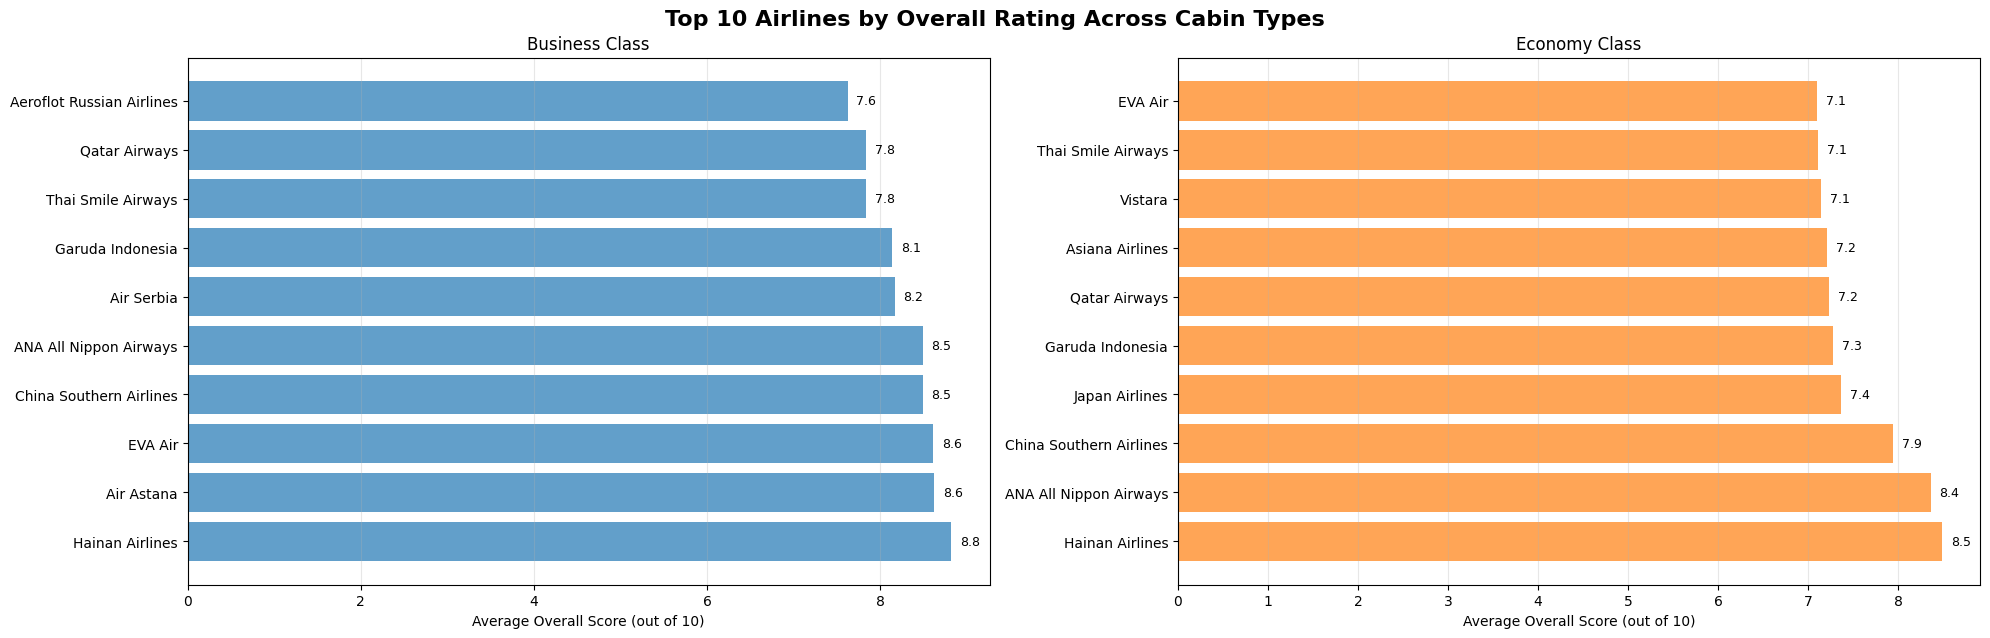

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Top 10 Airlines by Overall Rating Across Cabin Types', fontsize=16, fontweight='bold')

cabin_types = list(top_10_by_cabin.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, (cabin_type, data) in enumerate(top_10_by_cabin.items()):
    if i < 4:  # Handle up to 4 cabin types
        row = i // 2
        col = i % 2
        
        # Create horizontal bar chart
        y_pos = range(len(data))
        axes[row, col].barh(y_pos, data['AvgOverallScore'], 
                           color=colors[i], alpha=0.7)
        axes[row, col].set_yticks(y_pos)
        axes[row, col].set_yticklabels(data['AirlineName'], fontsize=10)
        axes[row, col].set_xlabel('Average Overall Score (out of 10)')
        axes[row, col].set_title(f'{cabin_type}')
        axes[row, col].grid(axis='x', alpha=0.3)
        
        # Add score labels on bars
        for j, score in enumerate(data['AvgOverallScore']):
            axes[row, col].text(score + 0.1, j, f'{score:.1f}', 
                               va='center', fontsize=9)

# Remove empty subplots if less than 4 cabin types
if len(cabin_types) < 4:
    for i in range(len(cabin_types), 4):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


There are two cabin types in this dataset, which are **business class** and **economy class**.

Top 10 airlines by overall rating in **business class** are,
1. Hainan Airlines
2. Air Astana
3. EVA Air
4. China Southern Airlines
5. ANA All Nippon Airways
6. Air Serbia	
7. Garuda Indonesia
8. Thai Smile Airways
9. Qatar Airways
10. Aeroflot Russian Airlines
  
Top 10 airlines by overall rating in **Economy class** are,
1. Hainan Airlines
2. ANA All Nippon Airways
3. China Southern Airlines
4. Japan Airlines
5. Garuda Indonesia
6. Qatar Airways
7. Asiana Airlines
8. Vistara
9. Thai Smile Airways
10. EVA Air

There are 7 airlines that appear in top 10 on both cabin types. Those are,
* Hainan Airlines
* ANA All Nippon Airways
* EVA Air
* China Southern Airways
* Garuda Indonesia
* Qatar Airways
* Thai Smile Airways

There are total of 13 unique airlines appear in both top 10 lists. Hainan Airlines has the highest overall rating in both cabin types.

*Note: Analysis limited to airlines with ≥5 reviews per cabin type for statistical reliability.*

In [18]:
# Identified top-10 airlines from overall ratings
business_top10_overall = ['Hainan Airlines','Air Astana','EVA Air','China Southern Airlines',
                          'ANA All Nippon Airways','Air Serbia','Garuda Indonesia',
                          'Thai Smile Airways','Qatar Airways','Aeroflot Russian Airlines']

economy_top10_overall = ['Hainan Airlines','ANA All Nippon Airways','China Southern Airlines',
                         'Japan Airlines','Garuda Indonesia','Qatar Airways','Asiana Airlines',
                         'Vistara','Thai Smile Airways','EVA Air']

# Function to get top-10 airlines by specific service rating
def get_top10_by_service(df, service_column, cabin_type, min_reviews=5):
    """Get top 10 airlines by service rating for specific cabin type"""
    filtered_df = df[df['CabinType'] == cabin_type].copy()
    
    # Group by airline and calculate mean rating + review count
    service_stats = (filtered_df.groupby('AirlineName')[service_column]
                    .agg(['mean', 'count'])
                    .reset_index())
    service_stats.columns = ['AirlineName', f'Avg_{service_column}', 'ReviewCount']
    
    # Filter airlines with minimum review threshold
    service_stats = service_stats[service_stats['ReviewCount'] >= min_reviews]
    
    # Get top 10
    top10 = service_stats.nlargest(10, f'Avg_{service_column}')
    return top10

# Define service categories
service_categories = {
    'Entertainment': 'EntertainmentRating',
    'Food': 'FoodRating', 
    'Ground Service': 'GroundServiceRating'
}

# Business Class service rankings (displayed as tables)
print("======= BUSINESS CLASS SERVICE RANKINGS =======")
business_service_rankings = {}
for service, column in service_categories.items():
    rankings = get_top10_by_service(sample_df, column, 'Business Class')
    business_service_rankings[service] = rankings
    print(f"\nBusiness Class - Top 10 by {service}")
    display(rankings[['AirlineName', f'Avg_{column}', 'ReviewCount']].round(2))

# Economy Class service rankings (displayed as tables)
print("======= ECONOMY CLASS SERVICE RANKINGS =======")
economy_service_rankings = {}
for service, column in service_categories.items():
    rankings = get_top10_by_service(sample_df, column, 'Economy Class')
    economy_service_rankings[service] = rankings
    print(f"\nEconomy Class - Top 10 by {service}")
    display(rankings[['AirlineName', f'Avg_{column}', 'ReviewCount']].round(2))


======= BUSINESS CLASS SERVICE RANKINGS =======

Business Class - Top 10 by Entertainment


,AirlineName,Avg_EntertainmentRating,ReviewCount
38,EVA Air,3.98,59
41,Emirates,3.88,277
74,Qatar Airways,3.77,449
31,Cathay Pacific Airways,3.73,176
52,Hainan Airlines,3.66,56
82,Singapore Airlines,3.63,170
0,ANA All Nippon Airways,3.62,39
34,China Southern Airlines,3.59,307
13,Air New Zealand,3.58,55
5,Air Astana,3.50,32



Business Class - Top 10 by Food


,AirlineName,Avg_FoodRating,ReviewCount
52,Hainan Airlines,4.54,56
38,EVA Air,4.34,59
0,ANA All Nippon Airways,4.26,39
5,Air Astana,4.19,32
34,China Southern Airlines,4.14,307
49,Garuda Indonesia,4.08,115
74,Qatar Airways,4.06,449
3,Aeroflot Russian Airlines,4.00,29
14,Air Serbia,4.00,12
6,Air Berlin,3.95,20



Business Class - Top 10 by Ground Service


,AirlineName,Avg_GroundServiceRating,ReviewCount
38,EVA Air,4.34,59
34,China Southern Airlines,4.24,307
0,ANA All Nippon Airways,4.18,39
52,Hainan Airlines,4.14,56
14,Air Serbia,4.08,12
8,Air Canada rouge,4.08,13
49,Garuda Indonesia,4.03,115
25,Bangkok Airways,4.00,6
5,Air Astana,3.94,32
56,Japan Airlines,3.91,34


======= ECONOMY CLASS SERVICE RANKINGS =======

Economy Class - Top 10 by Entertainment


,AirlineName,Avg_EntertainmentRating,ReviewCount
77,Qatar Airways,3.75,736
53,Hainan Airlines,3.74,143
85,Singapore Airlines,3.47,457
31,Cathay Pacific Airways,3.39,349
0,ANA All Nippon Airways,3.36,137
63,Korean Air,3.29,122
41,Emirates,3.29,810
34,China Southern Airlines,3.27,686
38,EVA Air,3.24,118
57,Japan Airlines,3.05,111



Economy Class - Top 10 by Food


,AirlineName,Avg_FoodRating,ReviewCount
53,Hainan Airlines,4.22,143
0,ANA All Nippon Airways,3.96,137
34,China Southern Airlines,3.83,686
77,Qatar Airways,3.71,736
22,Asiana Airlines,3.64,95
63,Korean Air,3.60,122
57,Japan Airlines,3.59,111
38,EVA Air,3.58,118
50,Garuda Indonesia,3.48,224
106,Vistara,3.42,103



Economy Class - Top 10 by Ground Service


,AirlineName,Avg_GroundServiceRating,ReviewCount
0,ANA All Nippon Airways,4.39,137
53,Hainan Airlines,4.21,143
34,China Southern Airlines,4.20,686
57,Japan Airlines,3.90,111
96,Thai Smile Airways,3.80,138
38,EVA Air,3.76,118
22,Asiana Airlines,3.71,95
106,Vistara,3.70,103
77,Qatar Airways,3.69,736
85,Singapore Airlines,3.69,457


In [19]:
def create_consistency_analysis(overall_top10, service_rankings, cabin_class):
    """Create detailed consistency analysis matrix"""
    analysis_data = []
    
    for rank, airline in enumerate(overall_top10, 1):
        row = {
            'Airline': airline,
            'Overall_Rank': rank
        }
        
        # Check presence in each service category
        for service, rankings_df in service_rankings.items():
            service_airlines = rankings_df['AirlineName'].tolist()
            if airline in service_airlines:
                service_rank = service_airlines.index(airline) + 1
                row[f'{service}_Rank'] = service_rank
                row[f'{service}_InTop10'] = '✓'
            else:
                row[f'{service}_Rank'] = 'Not in Top 10'
                row[f'{service}_InTop10'] = '✗'
        
        analysis_data.append(row)
    
    return pd.DataFrame(analysis_data)

# Generate consistency matrices
business_consistency = create_consistency_analysis(
    business_top10_overall, business_service_rankings, 'Business Class'
)

economy_consistency = create_consistency_analysis(
    economy_top10_overall, economy_service_rankings, 'Economy Class'
)

# Display as tables instead of prints
print("======= BUSINESS CLASS CONSISTENCY MATRIX =======")
display(business_consistency[['Airline', 'Overall_Rank', 
                              'Entertainment_InTop10', 
                              'Food_InTop10', 
                              'Ground Service_InTop10']])

print("\n======= ECONOMY CLASS CONSISTENCY MATRIX =======")
display(economy_consistency[['Airline', 'Overall_Rank', 
                             'Entertainment_InTop10', 
                             'Food_InTop10', 
                             'Ground Service_InTop10']])

======= BUSINESS CLASS CONSISTENCY MATRIX =======


,Airline,Overall_Rank,Entertainment_InTop10,Food_InTop10,Ground Service_InTop10
0,Hainan Airlines,1,✓,✓,✓
1,Air Astana,2,✓,✓,✓
2,EVA Air,3,✓,✓,✓
3,China Southern Airlines,4,✓,✓,✓
4,ANA All Nippon Airways,5,✓,✓,✓
5,Air Serbia,6,✗,✓,✓
6,Garuda Indonesia,7,✗,✓,✓
7,Thai Smile Airways,8,✗,✗,✗
8,Qatar Airways,9,✓,✓,✗
9,Aeroflot Russian Airlines,10,✗,✓,✗



======= ECONOMY CLASS CONSISTENCY MATRIX =======


,Airline,Overall_Rank,Entertainment_InTop10,Food_InTop10,Ground Service_InTop10
0,Hainan Airlines,1,✓,✓,✓
1,ANA All Nippon Airways,2,✓,✓,✓
2,China Southern Airlines,3,✓,✓,✓
3,Japan Airlines,4,✓,✓,✓
4,Garuda Indonesia,5,✗,✓,✗
5,Qatar Airways,6,✓,✓,✓
6,Asiana Airlines,7,✗,✓,✓
7,Vistara,8,✗,✓,✓
8,Thai Smile Airways,9,✗,✗,✓
9,EVA Air,10,✓,✓,✓


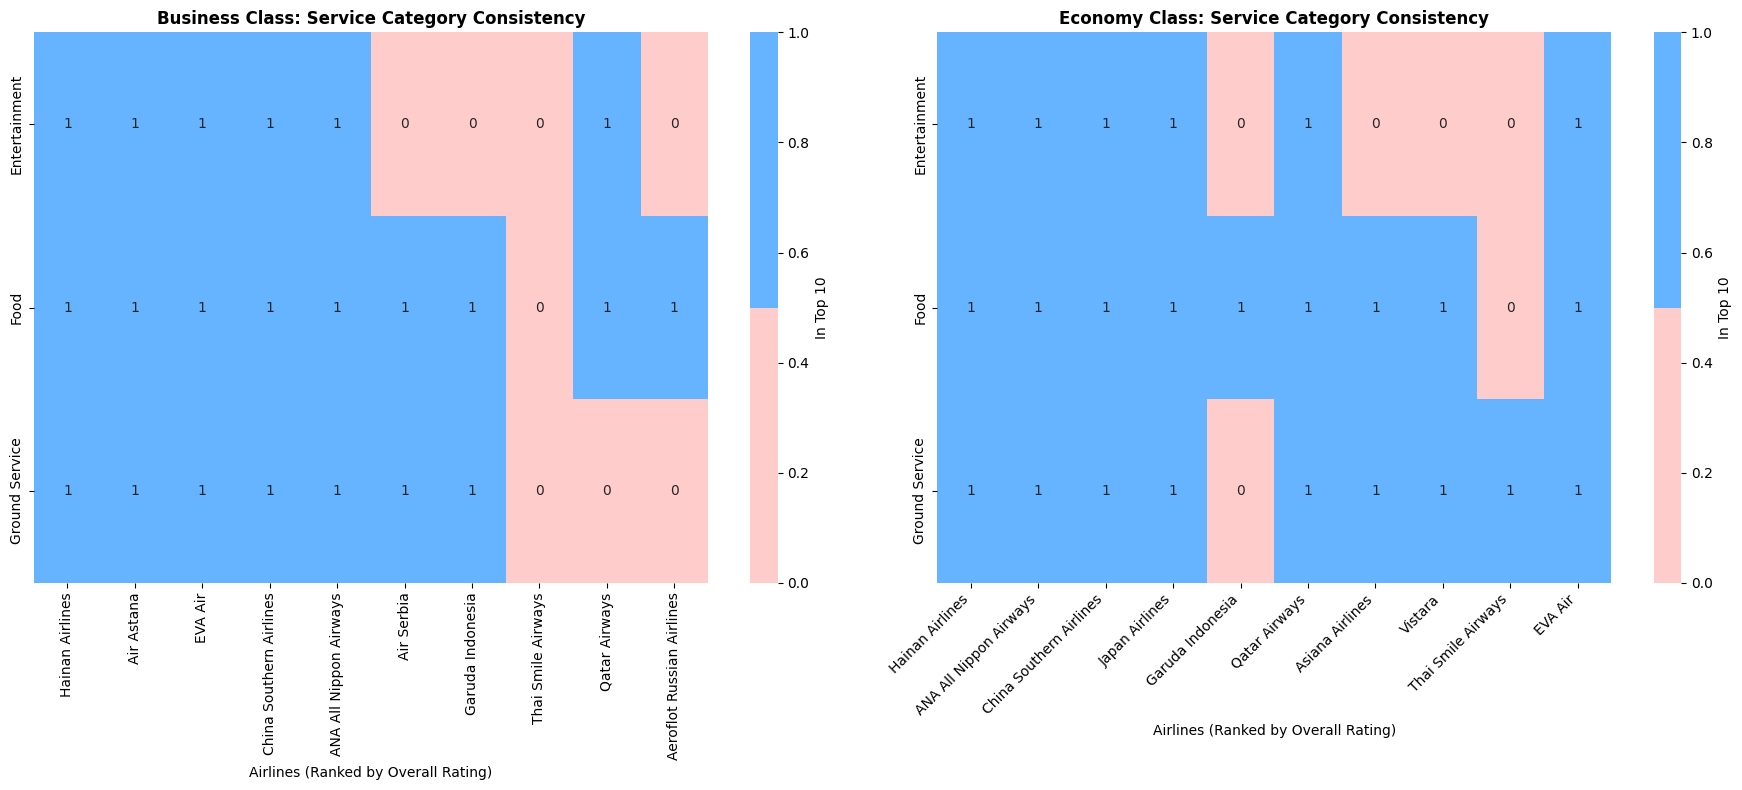

In [20]:
pd.set_option('future.no_silent_downcasting', True)

# Create heatmap visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Business Class Heatmap
business_heatmap_data = business_consistency[['Entertainment_InTop10', 'Food_InTop10', 'Ground Service_InTop10']].copy()
business_heatmap_data = business_heatmap_data.replace({'✓': 1, '✗': 0}).infer_objects(copy=False)
business_heatmap_data.index = business_consistency['Airline']

sns.heatmap(business_heatmap_data.T, 
            cmap=['#ffcccc', '#66b3ff'], 
            cbar_kws={'label': 'In Top 10'}, 
            annot=True, 
            fmt='d',
            xticklabels=True,
            yticklabels=['Entertainment', 'Food', 'Ground Service'],
            ax=axes[0])
axes[0].set_title('Business Class: Service Category Consistency', fontweight='bold')
axes[0].set_xlabel('Airlines (Ranked by Overall Rating)')

# Economy Class Heatmap
economy_heatmap_data = economy_consistency[['Entertainment_InTop10', 'Food_InTop10', 'Ground Service_InTop10']].copy()
economy_heatmap_data = economy_heatmap_data.replace({'✓': 1, '✗': 0}).infer_objects(copy=False)
economy_heatmap_data.index = economy_consistency['Airline']

sns.heatmap(economy_heatmap_data.T, 
            cmap=['#ffcccc', '#66b3ff'], 
            cbar_kws={'label': 'In Top 10'}, 
            annot=True, 
            fmt='d',
            xticklabels=True,
            yticklabels=['Entertainment', 'Food', 'Ground Service'],
            ax=axes[1])
axes[1].set_title('Economy Class: Service Category Consistency', fontweight='bold')
axes[1].set_xlabel('Airlines (Ranked by Overall Rating)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [21]:
def calculate_consistency_stats(consistency_df):
    """Calculate detailed consistency statistics"""
    total_airlines = len(consistency_df)
    
    stats = {}
    for service in ['Entertainment', 'Food', 'Ground Service']:
        in_top10 = len(consistency_df[consistency_df[f'{service}_InTop10'] == '✓'])
        consistency_rate = (in_top10 / total_airlines) * 100
        stats[service] = {
            'airlines_in_top10': in_top10,
            'consistency_rate': consistency_rate
        }
    
    # Find most/least consistent airlines
    consistency_df['total_categories'] = (
        (consistency_df['Entertainment_InTop10'] == '✓').astype(int) +
        (consistency_df['Food_InTop10'] == '✓').astype(int) +
        (consistency_df['Ground Service_InTop10'] == '✓').astype(int)
    )
    
    most_consistent = consistency_df[consistency_df['total_categories'] == consistency_df['total_categories'].max()]
    least_consistent = consistency_df[consistency_df['total_categories'] == consistency_df['total_categories'].min()]
    
    return stats, most_consistent, least_consistent

# Calculate statistics for both cabin classes
business_stats, business_most, business_least = calculate_consistency_stats(business_consistency)
economy_stats, economy_most, economy_least = calculate_consistency_stats(economy_consistency)

print("=== CONSISTENCY STATISTICS ===")
print("\nBusiness Class:")
for service, data in business_stats.items():
    print(f"  {service}: {data['airlines_in_top10']}/10 airlines maintain top-10 status ({data['consistency_rate']:.1f}%)")

print("\nEconomy Class:")  
for service, data in economy_stats.items():
    print(f"  {service}: {data['airlines_in_top10']}/10 airlines maintain top-10 status ({data['consistency_rate']:.1f}%)")


=== CONSISTENCY STATISTICS ===

Business Class:
  Entertainment: 6/10 airlines maintain top-10 status (60.0%)
  Food: 9/10 airlines maintain top-10 status (90.0%)
  Ground Service: 7/10 airlines maintain top-10 status (70.0%)

Economy Class:
  Entertainment: 6/10 airlines maintain top-10 status (60.0%)
  Food: 9/10 airlines maintain top-10 status (90.0%)
  Ground Service: 9/10 airlines maintain top-10 status (90.0%)


In [22]:
# Identify airlines that drop out of specific service categories
def identify_dropouts(consistency_df, service_rankings):
    """Identify airlines that fall out of top-10 in specific categories"""
    dropouts = {}
    
    for service in ['Entertainment', 'Food', 'Ground Service']:
        dropped_airlines = consistency_df[
            consistency_df[f'{service}_InTop10'] == '✗'
        ]['Airline'].tolist()
        dropouts[service] = dropped_airlines
    
    return dropouts

business_dropouts = identify_dropouts(business_consistency, business_service_rankings)
economy_dropouts = identify_dropouts(economy_consistency, economy_service_rankings)

print("=== AIRLINES DROPPING OUT OF SERVICE CATEGORIES ===")
print("\nBusiness Class:")
for service, airlines in business_dropouts.items():
    print(f"  {service}: {', '.join(airlines) if airlines else 'None'}")

print("\nEconomy Class:")
for service, airlines in economy_dropouts.items():
    print(f"  {service}: {', '.join(airlines) if airlines else 'None'}")


=== AIRLINES DROPPING OUT OF SERVICE CATEGORIES ===

Business Class:
  Entertainment: Air Serbia, Garuda Indonesia, Thai Smile Airways, Aeroflot Russian Airlines
  Food: Thai Smile Airways
  Ground Service: Thai Smile Airways, Qatar Airways, Aeroflot Russian Airlines

Economy Class:
  Entertainment: Garuda Indonesia, Asiana Airlines, Vistara, Thai Smile Airways
  Food: Thai Smile Airways
  Ground Service: Garuda Indonesia


There are few major dropouts can be identified in business class.
* Entertainment category shows the hightest inconsistancy in the business class. Four airlines failed to appear in top 10 overall rating list.
* Thai Smile Airways failed to appear in top lists of all three categories (entertainment, food, and ground service). They managed to appear in top 10 overall rating list without performing better in service categories.
* Top 5 airlines in overall rating list managed to appear in top 10 lists of all three service categories.
* Food service ratings are achive 9 out of 10, which is near perfect performance. 


Economy class shows better consistency across all three service categories compared to business class. Key insights that can be identified in economy class are,
* Entertainment category shows the weakest consistency, similar to the business class.
* Food ratings and ground service ratines are achive 9 out of 10, which is near perfect performance.
* Economy class passengers gave higher rating to ground service than business class passengers. This implies that ecomony class passengers are well satisfied with compared to business class passengers regarding the ground service offered by top 10 airlines.

#### Variation analysis on entertainment, food and ground services

Possible reasons for entertainment rating variance:
* Airlines such as Thai Smaile Airways may prioritize short to medium haul flights. Therefore in these airlines entertainment systems may not given priority.
* Airline fleets such as Air Serbia and Garuda Indonesia can be operate with older aircrafts that lacks quality entertainment systems.
* Airlines may focus on reliability and basic services rather than best quality entertainment systems.

Possible reasons for foot rating variance:
* Thai Smile Airways's low cost business model compromises catering quality to maintain competitive and afordable pricing for passengers.
* Asian airlines maintain strong food consistency becuase of their cultural expertise.
* Larger airlines struggle with consistant food quality due to their large operational scale across routes all over the world.

Possible reasons for ground service rating variance:
* Most airlines operating on airports that are under-resoursed or situated in congested areas may face limitations in ground service.
* Ground service quality is heavily depends on third party service agreements with different airports.
* Airlines may prioritize in-flight crew training rather that ground service training.

In [23]:
# Group by airline and cabin type, calculate mean overall score
airline_cabin_ratings = (
    sample_df.groupby(['AirlineName', 'CabinType'])['OverallScore']
             .agg(['mean', 'count'])
             .reset_index()
)

airline_cabin_ratings.columns = ['AirlineName', 'CabinType', 'AvgOverallScore', 'ReviewCount']

# Filter airlines with at least 5 reviews per cabin type for reliability
airline_cabin_ratings = airline_cabin_ratings[airline_cabin_ratings['ReviewCount'] >= 5]

def get_bottom_airlines_by_cabin(df, n=10):
    top_airlines = {}
    cabin_types = df['CabinType'].unique()
    
    for cabin in cabin_types:
        cabin_data = df[df['CabinType'] == cabin].nsmallest(n, 'AvgOverallScore')
        top_airlines[cabin] = cabin_data.reset_index(drop=True)
    
    return top_airlines

# Get top 10 airlines for each cabin type
bottom_10_by_cabin = get_bottom_airlines_by_cabin(airline_cabin_ratings)

cabin_types = list(bottom_10_by_cabin.keys())

for cabin in cabin_types:
    print(f"\nBottom 10 Airlines - {cabin}")
    display(bottom_10_by_cabin[cabin][['AirlineName', 'AvgOverallScore', 'ReviewCount']].round(3))



Bottom 10 Airlines - Business Class


,AirlineName,AvgOverallScore,ReviewCount
0,Spirit Airlines,1.222,9
1,Allegiant Air,1.889,9
2,Southwest Airlines,2.800,15
3,CSA Czech Airlines,3.400,5
4,Avianca,3.553,47
5,Condor Airlines,3.722,18
6,Copa Airlines,3.792,24
7,Jetblue Airways,3.880,25
8,Air Europa,4.065,31
9,Brussels Airlines,4.086,35



Bottom 10 Airlines - Economy Class


,AirlineName,AvgOverallScore,ReviewCount
0,VivaAerobús,1.610,82
1,Frontier Airlines,1.662,1769
2,Volaris,1.693,218
3,GoAir,2.027,113
4,American Airlines,2.047,2764
5,Spirit Airlines,2.108,2621
6,Breeze Airways,2.145,69
7,Silver Airways,2.190,121
8,Allegiant Air,2.221,934
9,Wizz Air,2.312,414


In [24]:
# Function to get top-10 airlines by specific service rating
def get_bottom10_by_service(df, service_column, cabin_type, min_reviews=5):
    """Get bottom 10 airlines by service rating for specific cabin type"""
    filtered_df = df[df['CabinType'] == cabin_type].copy()
    
    # Group by airline and calculate mean rating + review count
    service_stats = (filtered_df.groupby('AirlineName')[service_column]
                    .agg(['mean', 'count'])
                    .reset_index())
    service_stats.columns = ['AirlineName', f'Avg_{service_column}', 'ReviewCount']
    
    # Filter airlines with minimum review threshold
    service_stats = service_stats[service_stats['ReviewCount'] >= min_reviews]
    
    # Get bottom 10
    bottom10 = service_stats.nsmallest(10, f'Avg_{service_column}')
    return bottom10

# Define service categories
service_categories = {
    'Entertainment': 'EntertainmentRating',
    'Food': 'FoodRating', 
    'Ground Service': 'GroundServiceRating'
}

# Business Class service rankings
print("======= BUSINESS CLASS SERVICE RANKINGS =======")
business_service_rankings = {}
for service, column in service_categories.items():
    rankings = get_bottom10_by_service(sample_df, column, 'Business Class')
    business_service_rankings[service] = rankings
    print(f"\nBusiness Class - Bottom 10 by {service}")
    display(rankings[['AirlineName', f'Avg_{column}', 'ReviewCount']].round(2))

# Economy Class service rankings
print("======= ECONOMY CLASS SERVICE RANKINGS =======")
economy_service_rankings = {}
for service, column in service_categories.items():
    rankings = get_bottom10_by_service(sample_df, column, 'Economy Class')
    economy_service_rankings[service] = rankings
    print(f"\nEconomy Class - Bottom 10 by {service}")
    display(rankings[['AirlineName', f'Avg_{column}', 'ReviewCount']].round(2))


======= BUSINESS CLASS SERVICE RANKINGS =======

Business Class - Bottom 10 by Entertainment


,AirlineName,Avg_EntertainmentRating,ReviewCount
85,Spirit Airlines,0.22,9
20,Allegiant Air,0.56,9
25,Bangkok Airways,0.67,6
80,Scoot,0.87,30
14,Air Serbia,1.00,12
29,Brussels Airlines,1.00,35
30,CSA Czech Airlines,1.00,5
84,Southwest Airlines,1.07,15
92,Thai Smile Airways,1.17,6
96,Ukraine International,1.18,11



Business Class - Bottom 10 by Food


,AirlineName,Avg_FoodRating,ReviewCount
85,Spirit Airlines,0.44,9
20,Allegiant Air,1.00,9
84,Southwest Airlines,1.40,15
24,Avianca,1.70,47
18,Alaska Airlines,1.92,13
36,Copa Airlines,2.00,24
80,Scoot,2.17,30
58,Jetblue Airways,2.20,25
4,Aeromexico,2.22,51
10,Air Europa,2.23,31



Business Class - Bottom 10 by Ground Service


,AirlineName,Avg_GroundServiceRating,ReviewCount
85,Spirit Airlines,1.44,9
84,Southwest Airlines,1.73,15
20,Allegiant Air,1.89,9
35,Condor Airlines,1.94,18
44,Eurowings,2.00,8
10,Air Europa,2.06,31
58,Jetblue Airways,2.12,25
30,CSA Czech Airlines,2.20,5
36,Copa Airlines,2.25,24
75,Royal Air Maroc,2.25,8


======= ECONOMY CLASS SERVICE RANKINGS =======

Economy Class - Bottom 10 by Entertainment


,AirlineName,Avg_EntertainmentRating,ReviewCount
67,Lion Air,0.16,91
115,easyJet,0.19,657
84,Silver Airways,0.21,121
16,AirAsia,0.22,377
80,Ryanair,0.23,1021
110,Vueling Airlines,0.23,585
48,FlySafair,0.25,75
51,GoAir,0.26,113
47,Flair Airlines,0.29,542
17,AirAsia X,0.29,68



Economy Class - Bottom 10 by Food


,AirlineName,Avg_FoodRating,ReviewCount
67,Lion Air,0.36,91
51,GoAir,0.49,113
84,Silver Airways,0.50,121
47,Flair Airlines,0.54,542
49,Frontier Airlines,0.60,1769
108,Volaris,0.63,218
89,Spirit Airlines,0.63,2621
107,VivaAerobús,0.63,82
110,Vueling Airlines,0.72,585
113,Wizz Air,0.75,414



Economy Class - Bottom 10 by Ground Service


,AirlineName,Avg_GroundServiceRating,ReviewCount
51,GoAir,1.19,113
107,VivaAerobús,1.21,82
108,Volaris,1.25,218
49,Frontier Airlines,1.32,1769
113,Wizz Air,1.49,414
84,Silver Airways,1.51,121
21,American Airlines,1.52,2764
89,Spirit Airlines,1.53,2621
20,Allegiant Air,1.60,934
27,Breeze Airways,1.61,69


#### Qantas Airways and Jetstar Airways Performance 

Both Qantas and Jetstar airways are unable to appear in any of the above top 10 lists. Both airlines are not among the most recommended (top 10) or the least recommended (bottom 10) airlines for any cabin type. Therefore most likely these two airways falls under the middle tier airways category.

#### Qantas Airways Performance Trends Analysis compared to top 5 airlines

In [25]:
def get_top_airlines_overall(df, top_n=5, min_reviews=15):
    # Group by airline and calculate overall statistics
    airline_stats = df.groupby('AirlineName').agg({
        'OverallScore': ['mean', 'count', 'std']
    }).round(3)
    
    # Flatten column names
    airline_stats.columns = ['AvgOverallScore', 'ReviewCount', 'StdDev']
    airline_stats = airline_stats.reset_index()
    
    # Filter airlines with minimum review threshold for statistical reliability
    airline_stats = airline_stats[airline_stats['ReviewCount'] >= min_reviews]
    
    # Sort by average overall score and get top N
    top_airlines = airline_stats.sort_values('AvgOverallScore', ascending=False).head(top_n)
    
    return top_airlines

# Execute the function to get top 5 airlines
top5_airlines_overall = get_top_airlines_overall(sample_df, top_n=5, min_reviews=15)

print("=== TOP 5 AIRLINES BY OVERALL RATING (ALL CABIN TYPES) ===")
print(top5_airlines_overall)

# Extract just the airline names for further analysis
top5_airline_names = top5_airlines_overall['AirlineName'].tolist()
print(f"\nTop 5 Airline Names: {top5_airline_names}")


=== TOP 5 AIRLINES BY OVERALL RATING (ALL CABIN TYPES) ===
                AirlineName  AvgOverallScore  ReviewCount  StdDev
53          Hainan Airlines            8.578          199   2.126
0    ANA All Nippon Airways            8.386          176   2.245
34  China Southern Airlines            8.113          993   2.005
5                Air Astana            7.615           91   3.214
38                  EVA Air            7.605          177   2.855

Top 5 Airline Names: ['Hainan Airlines', 'ANA All Nippon Airways', 'China Southern Airlines', 'Air Astana', 'EVA Air']


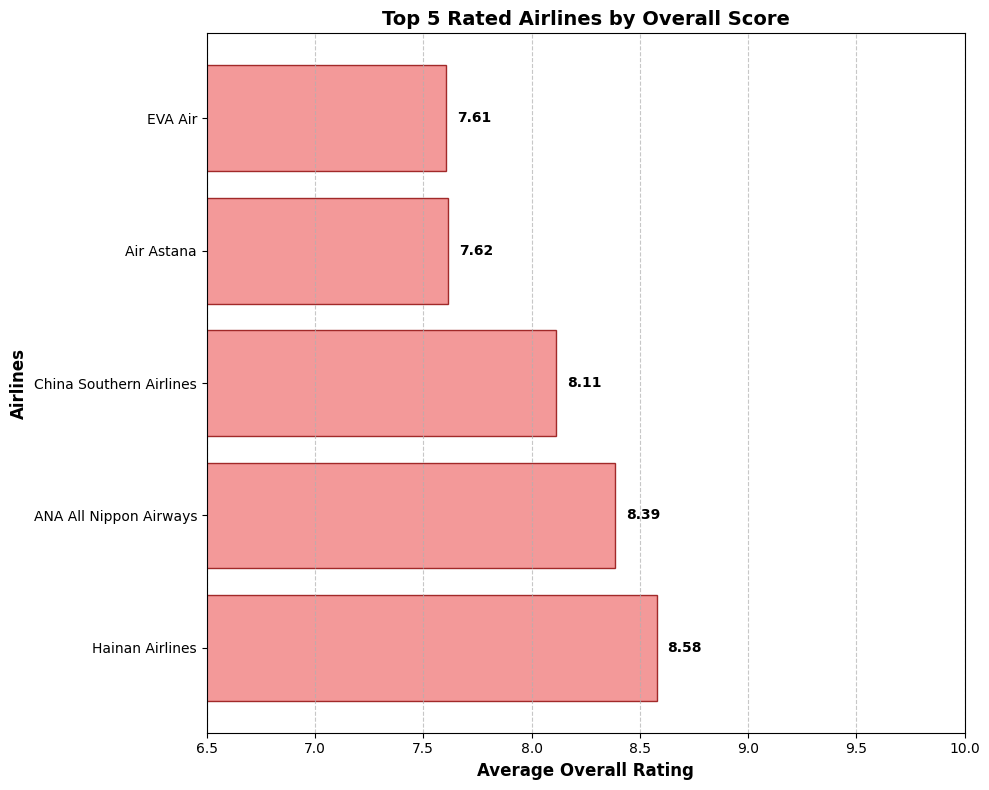

In [26]:
# Horizontal bar chart (good for long airline names)
plt.figure(figsize=(10, 8))

bars = plt.barh(top5_airlines_overall['AirlineName'], 
                top5_airlines_overall['AvgOverallScore'],
                color='lightcoral',
                edgecolor='darkred',
                alpha=0.8)

plt.xlabel('Average Overall Rating', fontsize=12, fontweight='bold')
plt.ylabel('Airlines', fontsize=12, fontweight='bold')
plt.title('Top 5 Rated Airlines by Overall Score', fontsize=14, fontweight='bold')
plt.xlim(6.5, 10)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}',
             ha='left', va='center', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
target_airlines = top5_airline_names + ['Qantas Airways']

def create_monthly_ratings_df(df, airlines, default_year=2024):
    """
    Create monthly average ratings DataFrame for specified airlines
    """
    df_copy = df.copy()
    
    # Change format "23-Jan" -> "23-Jan-2024"
    df_copy['DateWithYear'] = df_copy['DateFlown'].astype(str) + f'-{default_year}'
    df_copy['DateParsed'] = pd.to_datetime(df_copy['DateWithYear'], format='%b-%d-%Y', errors='coerce')
    df_copy.drop(columns=['DateWithYear'], inplace=True)
    
    # Extract Year-Month for grouping
    df_copy['YearMonth'] = df_copy['DateParsed'].dt.to_period('M')
    
    # Filter for target airlines with valid data
    filtered_df = df_copy[
        (df_copy['AirlineName'].isin(airlines)) & 
        (df_copy['DateParsed'].notna()) &
        (df_copy['OverallScore'].notna())
    ].copy()
    
    print(f"Filtered data shape: {filtered_df.shape}")
    print(f"Airlines found: {sorted(filtered_df['AirlineName'].unique())}")
    print(f"Date range: {filtered_df['DateParsed'].min()} to {filtered_df['DateParsed'].max()}")
    
    # Group by YearMonth and AirlineName, calculate mean ratings
    monthly_ratings = (filtered_df.groupby(['YearMonth', 'AirlineName'])['OverallScore']
                      .mean()
                      .reset_index())
    
    # Pivot to have airlines as columns
    monthly_pivot = monthly_ratings.pivot(index='YearMonth', 
                                         columns='AirlineName', 
                                         values='OverallScore')
    
    # Convert YearMonth back to datetime for plotting
    monthly_pivot.index = monthly_pivot.index.to_timestamp()
    
    # Reset index to make YearMonth a column
    monthly_df = monthly_pivot.reset_index()
    
    return monthly_df

# Generate the monthly ratings DataFrame
monthly_ratings_df = create_monthly_ratings_df(sample_df, target_airlines)

# Display the DataFrame
print("\n=== Monthly Average Ratings DataFrame ===")
print(monthly_ratings_df.head())
print(f"\nDataFrame shape: {monthly_ratings_df.shape}")
if not monthly_ratings_df.empty:
    print(f"Date range: {monthly_ratings_df['YearMonth'].min()} to {monthly_ratings_df['YearMonth'].max()}")

Filtered data shape: (2426, 19)
Airlines found: ['ANA All Nippon Airways', 'Air Astana', 'China Southern Airlines', 'EVA Air', 'Hainan Airlines', 'Qantas Airways']
Date range: 2024-01-15 00:00:00 to 2024-12-22 00:00:00

=== Monthly Average Ratings DataFrame ===
AirlineName  YearMonth  ANA All Nippon Airways  Air Astana  \
0           2024-01-01                9.272727    8.666667   
1           2024-02-01                9.000000    7.100000   
2           2024-03-01                8.133333    8.909091   
3           2024-04-01                6.800000    9.384615   
4           2024-05-01                7.909091    7.888889   

AirlineName  China Southern Airlines   EVA Air  Hainan Airlines  \
0                           8.051020  8.117647         9.272727   
1                           8.608108  7.666667         9.200000   
2                           8.292135  7.176471         8.812500   
3                           8.206186  6.800000         8.461538   
4                           8.

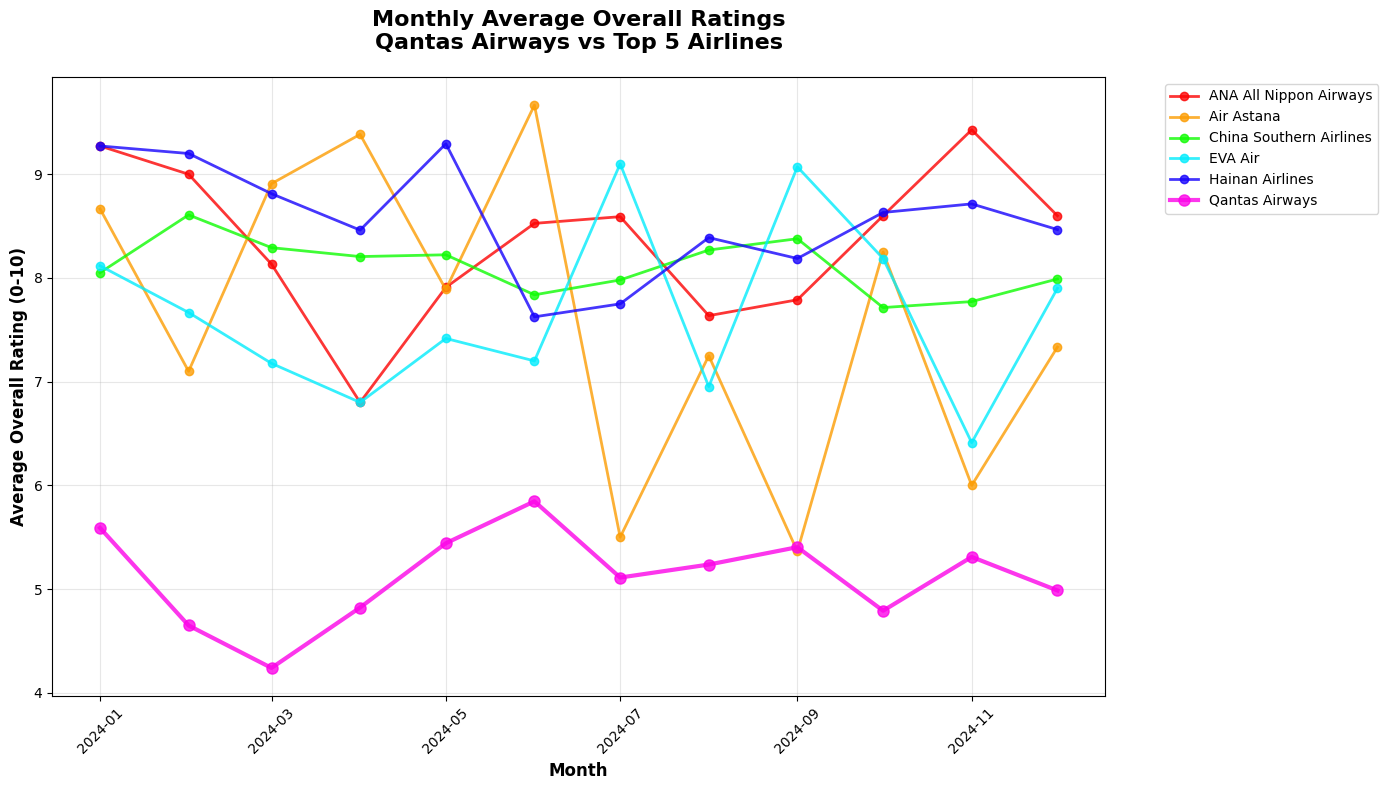


=== MONTHLY RATING SUMMARY ===

ANA All Nippon Airways:
  Average: 8.36
  Range: 6.80 - 9.43
  Std Dev: ±0.75
  Data Points: 12

Air Astana:
  Average: 7.61
  Range: 5.36 - 9.67
  Std Dev: ±1.45
  Data Points: 12

China Southern Airlines:
  Average: 8.11
  Range: 7.71 - 8.61
  Std Dev: ±0.27
  Data Points: 12

EVA Air:
  Average: 7.67
  Range: 6.41 - 9.10
  Std Dev: ±0.85
  Data Points: 12

Hainan Airlines:
  Average: 8.57
  Range: 7.62 - 9.29
  Std Dev: ±0.54
  Data Points: 12

Qantas Airways:
  Average: 5.12
  Range: 4.24 - 5.85
  Std Dev: ±0.45
  Data Points: 12


In [28]:
# Create line chart visualization
if not monthly_ratings_df.empty:
    plt.figure(figsize=(14, 8))
    
    # Define colors for each airline
    colors = ['#fc0303', '#fc9d03', '#0ffc03', '#03ecfc', '#1703fc', '#fc03e8']
    airlines_to_plot = [col for col in monthly_ratings_df.columns if col != 'YearMonth']
    
    for i, airline in enumerate(airlines_to_plot):
        if airline in monthly_ratings_df.columns:
            color = colors[i % len(colors)]
            linewidth = 3 if 'Qantas' in airline else 2
            marker_size = 8 if 'Qantas' in airline else 6
            
            # Handle both datetime and string x-axis
            x_data = monthly_ratings_df['YearMonth']
            y_data = monthly_ratings_df[airline].dropna()
            
            if len(y_data) > 0:
                plt.plot(x_data[:len(y_data)], y_data, 
                        marker='o', 
                        linewidth=linewidth, 
                        color=color, 
                        label=airline,
                        markersize=marker_size,
                        alpha=0.8)
    
    plt.title('Monthly Average Overall Ratings\nQantas Airways vs Top 5 Airlines', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Month', fontsize=12, fontweight='bold')
    plt.ylabel('Average Overall Rating (0-10)', fontsize=12, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n=== MONTHLY RATING SUMMARY ===")
    for airline in airlines_to_plot:
        if airline in monthly_ratings_df.columns:
            ratings = monthly_ratings_df[airline].dropna()
            if len(ratings) > 0:
                print(f"\n{airline}:")
                print(f"  Average: {ratings.mean():.2f}")
                print(f"  Range: {ratings.min():.2f} - {ratings.max():.2f}")
                print(f"  Std Dev: ±{ratings.std():.2f}")
                print(f"  Data Points: {len(ratings)}")

Hainan Airlines, China Southern Airlines, and ANA All Nippon Airways are show excellent performance and consistancey with high averages and small variations in overall rating values. The variation in average overall ratings of ANA All Nippon Airways is moderately higher that other top 2 airlines.

| Airline       | Average Rating | Std Dev |
|---------------|----------------|---------|
| Hainan Airlines       | 8.57           | ±0.54   |
| China Southern Airlines | 8.11          | ±0.27  |
| ANA All Nippon Airways | 8.36          | ±0.75  |

Air Astana and EVA Air managed to maintain high averate rating values but they are highly inconsistant. The dispersion of average overall rating values over each months is significantly higher. But these two airlines are among top 5 airlines.

| Airline       | Average Rating | Std Dev |
|---------------|----------------|---------|
| Air Astana  | 7.61         | ±1.45   |
| EVA  Air | 7.67        | ±0.85  |

Qantas Airways is not among the top 10 airlines since the average overall rating is significanly less than industry leaders. Another key observation is their underperformance remains consistant acros the year. This can be explained by the low standard variation of average overall ratings.

| Airline       | Average Rating | Std Dev |
|---------------|----------------|---------|
| Qantas Airways  | 5.12         | ±0.45  |

Qantas Airways is Australia's flag carrier. Their domestic competition is very low compared to other airlines in top list. This may be a main reason for their consistant underperformance. They need to introduce massive and stratigic improvements to deliver top quality service to their customers.

But in the otherhand top 5 airlines appears to be invest heavily in fleet modernization, staff trining and maintainance. Also their brand value and leaderships play huge role in their high performance.

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis


In [ ]:
!pip install textblob vaderSentiment

In [30]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def compute_textblob_sentiment(text):
    """
    Compute sentiment polarity using TextBlob
    Returns: polarity score (-1 to +1, where +1 is most positive)
    """
    if pd.isna(text) or not isinstance(text, str):
        return None
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

def compute_vader_sentiment(text):
    """
    Compute sentiment using VADER
    Returns: compound score (-1 to +1, where +1 is most positive)
    """
    analyzer = SentimentIntensityAnalyzer()
    if pd.isna(text) or not isinstance(text, str):
        return None
    try:
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    except:
        return None

# Calculate sentiment scores for all unique airlines
print(f"Total airlines in dataset: {sample_df['AirlineName'].nunique()}")
print(f"Total reviews to analyze: {len(sample_df):,}")

Total airlines in dataset: 117
Total reviews to analyze: 50,000


In [31]:
# Apply sentiment analysis
sample_df['TextBlob_Sentiment'] = sample_df['Review'].apply(compute_textblob_sentiment)
sample_df['VADER_Sentiment'] = sample_df['Review'].apply(compute_vader_sentiment)

# Calculate overall sentiment scores by airline
overall_sentiment = sample_df.groupby('AirlineName').agg({
    'TextBlob_Sentiment': ['mean', 'count', 'std'],
    'VADER_Sentiment': ['mean', 'std'],
    'Recommended': lambda x: (x == 'yes').mean() * 100  # Recommendation rate
}).round(4)

# Flatten column names
overall_sentiment.columns = ['TextBlob_Mean', 'Review_Count', 'TextBlob_Std', 
                           'VADER_Mean', 'VADER_Std', 'Recommendation_Rate']

# Sort by VADER sentiment (primary ranking)
overall_sentiment = overall_sentiment.sort_values('VADER_Mean', ascending=False)

In [32]:
print("\n=== COMPLETE SENTIMENT ANALYSIS RESULTS (ALL AIRLINES) ===")
print("Ranked by TextBlob Average Sentiment Score")
print("-" * 80)
print(f"{'Rank':<4} {'Airline':<35} {'TextBlob':<8} {'VADER':<8} {'Rec%':<6} {'Reviews':<8}")
print("-" * 80)

for i, (airline, row) in enumerate(overall_sentiment.iterrows(), 1):
    print(f"{i:<4} {airline[:34]:<35} {row['TextBlob_Mean']:<8.4f} {row['VADER_Mean']:<8.4f} "
          f"{row['Recommendation_Rate']:<6.1f} {int(row['Review_Count']):<8,}")

# Identify top 10 most positive airlines
top_10_sentiment = overall_sentiment.head(10)
print(f"\nTOP 10 AIRLINES BY POSITIVE SENTIMENT:")
print("=" * 60)
for i, (airline, row) in enumerate(top_10_sentiment.iterrows(), 1):
    print(f"{i:2d}. {airline}")
    print(f"    TextBlob Score: {row['TextBlob_Mean']:.4f}")
    print(f"    VADER Score: {row['VADER_Mean']:.4f}")
    print(f"    Recommendation Rate: {row['Recommendation_Rate']:.1f}%")
    print(f"    Based on {int(row['Review_Count']):,} reviews")
    print()


=== COMPLETE SENTIMENT ANALYSIS RESULTS (ALL AIRLINES) ===
Ranked by TextBlob Average Sentiment Score
--------------------------------------------------------------------------------
Rank Airline                             TextBlob VADER    Rec%   Reviews 
--------------------------------------------------------------------------------
1    Hainan Airlines                     0.3094   0.7910   87.9   199     
2    ANA All Nippon Airways              0.2555   0.7372   90.3   176     
3    China Southern Airlines             0.2359   0.7189   90.7   993     
4    Garuda Indonesia                    0.2274   0.6196   82.0   339     
5    EVA Air                             0.2682   0.6186   78.5   177     
6    Air Astana                          0.2445   0.6060   76.9   91      
7    Asiana Airlines                     0.2012   0.6039   75.2   137     
8    Qatar Airways                       0.2372   0.5706   76.5   1,185   
9    Japan Airlines                      0.2236   0.5587   7

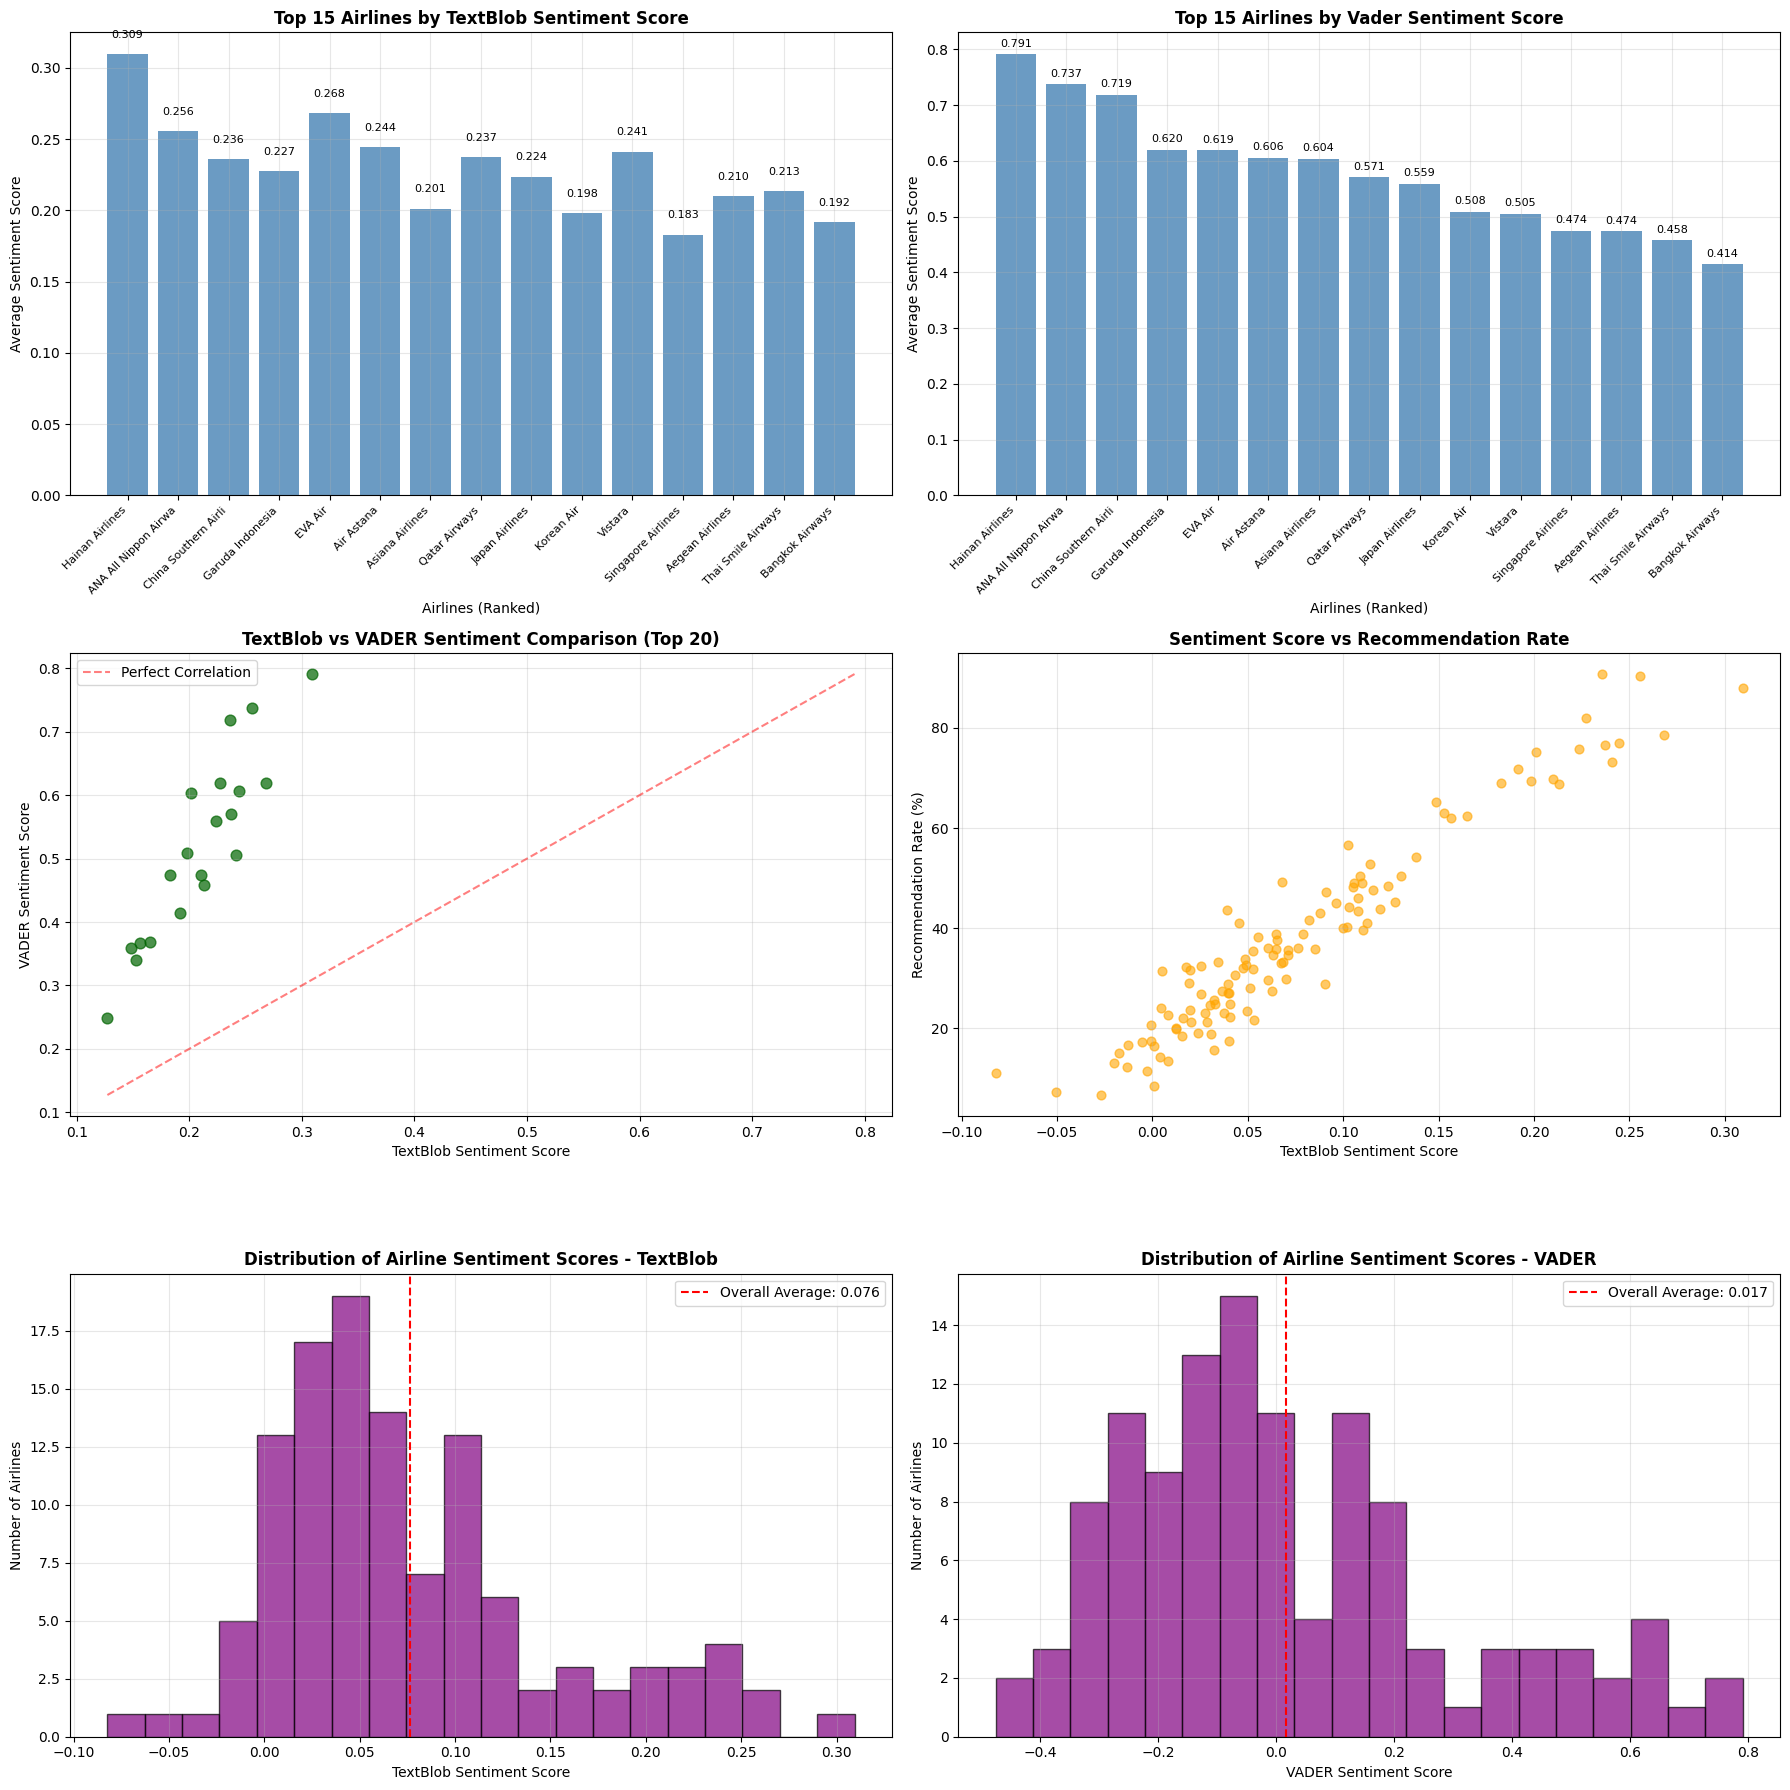

In [33]:
# Create comprehensive sentiment visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot 1: Top 15 Airlines by TextBlob Sentiment
top_15_sentiment = overall_sentiment.head(15)
bars1 = axes[0,0].bar(range(len(top_15_sentiment)), 
                      top_15_sentiment['TextBlob_Mean'], 
                      color='steelblue', alpha=0.8)

axes[0,0].set_title('Top 15 Airlines by TextBlob Sentiment Score', fontweight='bold', fontsize=12)
axes[0,0].set_xlabel('Airlines (Ranked)')
axes[0,0].set_ylabel('Average Sentiment Score')
axes[0,0].set_xticks(range(len(top_15_sentiment)))
axes[0,0].set_xticklabels([name[:20] for name in top_15_sentiment.index], 
                          rotation=45, ha='right', fontsize=8)
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 2: Top 15 Airlines by Vader Sentiment
top_15_sentiment = overall_sentiment.head(15)
bars1 = axes[0,1].bar(range(len(top_15_sentiment)), 
                      top_15_sentiment['VADER_Mean'], 
                      color='steelblue', alpha=0.8)

axes[0,1].set_title('Top 15 Airlines by Vader Sentiment Score', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('Airlines (Ranked)')
axes[0,1].set_ylabel('Average Sentiment Score')
axes[0,1].set_xticks(range(len(top_15_sentiment)))
axes[0,1].set_xticklabels([name[:20] for name in top_15_sentiment.index], 
                          rotation=45, ha='right', fontsize=8)
axes[0,1].grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 3: TextBlob vs VADER Comparison (Top 20)
top_20_sentiment = overall_sentiment.head(20)
axes[1,0].scatter(top_20_sentiment['TextBlob_Mean'], 
                  top_20_sentiment['VADER_Mean'],
                  alpha=0.7, s=60, c='darkgreen')

axes[1,0].set_title('TextBlob vs VADER Sentiment Comparison (Top 20)', fontweight='bold')
axes[1,0].set_xlabel('TextBlob Sentiment Score')
axes[1,0].set_ylabel('VADER Sentiment Score')
axes[1,0].grid(True, alpha=0.3)

# Add diagonal line for reference
min_val = min(top_20_sentiment['TextBlob_Mean'].min(), top_20_sentiment['VADER_Mean'].min())
max_val = max(top_20_sentiment['TextBlob_Mean'].max(), top_20_sentiment['VADER_Mean'].max())
axes[1,0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='Perfect Correlation')
axes[1,0].legend()

# Plot 4: Sentiment vs Recommendation Rate
axes[1,1].scatter(overall_sentiment['TextBlob_Mean'], 
                  overall_sentiment['Recommendation_Rate'],
                  alpha=0.6, s=40, c='orange')

axes[1,1].set_title('Sentiment Score vs Recommendation Rate', fontweight='bold')
axes[1,1].set_xlabel('TextBlob Sentiment Score')
axes[1,1].set_ylabel('Recommendation Rate (%)')
axes[1,1].grid(True, alpha=0.3)

# Plot 5: Distribution of TextBlob Sentiment Scores
axes[2,0].hist(overall_sentiment['TextBlob_Mean'].dropna(), 
               bins=20, alpha=0.7, color='purple', edgecolor='black')

axes[2,0].set_title('Distribution of Airline Sentiment Scores - TextBlob', fontweight='bold')
axes[2,0].set_xlabel('TextBlob Sentiment Score')
axes[2,0].set_ylabel('Number of Airlines')
axes[2,0].grid(True, alpha=0.3)

# Add vertical line for overall average
overall_avg = overall_sentiment['TextBlob_Mean'].mean()
axes[2,0].axvline(overall_avg, color='red', linestyle='--', 
                  label=f'Overall Average: {overall_avg:.3f}')
axes[2,0].legend()

# Plot 6: Distribution of VADER Sentiment Scores
axes[2,1].hist(overall_sentiment['VADER_Mean'].dropna(), 
               bins=20, alpha=0.7, color='purple', edgecolor='black')

axes[2,1].set_title('Distribution of Airline Sentiment Scores - VADER', fontweight='bold')
axes[2,1].set_xlabel('VADER Sentiment Score')
axes[2,1].set_ylabel('Number of Airlines')
axes[2,1].grid(True, alpha=0.3)

# Add vertical line for overall average
overall_avg = overall_sentiment['VADER_Mean'].mean()
axes[2,1].axvline(overall_avg, color='red', linestyle='--', 
                  label=f'Overall Average: {overall_avg:.3f}')
axes[2,1].legend()

plt.tight_layout()
plt.show()


**Hainan Airline** receives the most positive sentiment scores in TextBlob and VADER. Which is 0.3094 out of 1.0 and 0.7910 out of 1.0 respectively. This sentiment analysis on Hainan Airlines is based on 199 customer reviews. Also this airline is able to achive 87.9% of customer recommendation rate.

In [34]:
cabin_types = ['Economy Class', 'Business Class']
cabin_df = sample_df[sample_df['CabinType'].isin(cabin_types)].copy()

print(f"Analyzing sentiment for {len(cabin_df):,} reviews across Economy and Business Class")
print(f"Total airlines in analysis: {cabin_df['AirlineName'].nunique()}")

# Compute sentiment scores
cabin_df['TextBlob_Sentiment'] = cabin_df['Review'].apply(compute_textblob_sentiment)
cabin_df['VADER_Sentiment'] = cabin_df['Review'].apply(compute_vader_sentiment)

# Group by CabinType and AirlineName to calculate average sentiment
cabin_sentiment_analysis = cabin_df.groupby(['CabinType', 'AirlineName']).agg({
    'TextBlob_Sentiment': ['mean', 'count', 'std'],
    'VADER_Sentiment': ['mean', 'std'],
    'ServiceRating': 'mean',  # Include service rating for validation
    'Recommended': lambda x: (x == 'yes').mean() * 100
}).round(4)

# Flatten column names
cabin_sentiment_analysis.columns = ['TextBlob_Mean', 'Review_Count', 'TextBlob_Std', 
                                   'VADER_Mean', 'VADER_Std', 'Avg_Service_Rating', 
                                   'Recommendation_Rate']

# Reset index to make CabinType and AirlineName regular columns
cabin_sentiment_analysis = cabin_sentiment_analysis.reset_index()

# Filter for minimum reviews to ensure statistical reliability
min_reviews = 10
cabin_sentiment_analysis = cabin_sentiment_analysis[cabin_sentiment_analysis['Review_Count'] >= min_reviews]

print(f"Airlines with at least {min_reviews} reviews per cabin type: {len(cabin_sentiment_analysis)}")

Analyzing sentiment for 50,000 reviews across Economy and Business Class
Total airlines in analysis: 117
Airlines with at least 10 reviews per cabin type: 197


In [35]:
# Separate analysis for Economy Class and Business Class
economy_analysis = cabin_sentiment_analysis[cabin_sentiment_analysis['CabinType'] == 'Economy Class'].copy()
business_analysis = cabin_sentiment_analysis[cabin_sentiment_analysis['CabinType'] == 'Business Class'].copy()

# Sort by TextBlob sentiment score
economy_analysis = economy_analysis.sort_values('VADER_Mean', ascending=False)
business_analysis = business_analysis.sort_values('VADER_Mean', ascending=False)

print("="*80)
print("MOST POSITIVE SENTIMENT FOR ECONOMY CLASS SERVICES")
print("="*80)

if not economy_analysis.empty:
    # Top Economy Class performer
    top_economy = economy_analysis.iloc[0]
    
    print(f"   WINNER: {top_economy['AirlineName']}")
    print(f"   TextBlob Sentiment Score: {top_economy['TextBlob_Mean']:.4f}")
    print(f"   VADER Sentiment Score: {top_economy['VADER_Mean']:.4f}")
    print(f"   Average Service Rating: {top_economy['Avg_Service_Rating']:.2f}/5")
    print(f"   Recommendation Rate: {top_economy['Recommendation_Rate']:.1f}%")
    print(f"   Based on {int(top_economy['Review_Count']):,} Economy Class reviews")
    print(f"   Sentiment Consistency: ±{top_economy['TextBlob_Std']:.4f}")
    
    print(f"\nTOP 10 ECONOMY CLASS AIRLINES BY SENTIMENT:")
    print("-" * 80)
    print(f"{'Rank':<4} {'Airline':<30} {'VADER':<10} {'TextBlob':<10} {'Service':<8} {'Rec%':<6} {'Reviews':<8}")
    print("-" * 80)
    
    for i, (_, row) in enumerate(economy_analysis.head(10).iterrows(), 1):
        print(f"{i:<4} {row['AirlineName'][:29]:<30} {row['VADER_Mean']:<10.4f} {row['TextBlob_Mean']:<10.4f} "
              f"{row['Avg_Service_Rating']:<8.2f} {row['Recommendation_Rate']:<6.1f} {int(row['Review_Count']):<8,}")

print("\n" + "="*80)
print("MOST POSITIVE SENTIMENT FOR BUSINESS CLASS SERVICES")
print("="*80)

if not business_analysis.empty:
    # Top Business Class performer
    top_business = business_analysis.iloc[0]
    
    print(f"   WINNER: {top_business['AirlineName']}")
    print(f"   TextBlob Sentiment Score: {top_business['TextBlob_Mean']:.4f}")
    print(f"   VADER Sentiment Score: {top_business['VADER_Mean']:.4f}")
    print(f"   Average Service Rating: {top_business['Avg_Service_Rating']:.2f}/5")
    print(f"   Recommendation Rate: {top_business['Recommendation_Rate']:.1f}%")
    print(f"   Based on {int(top_business['Review_Count']):,} Business Class reviews")
    print(f"   Sentiment Consistency: ±{top_business['TextBlob_Std']:.4f}")
    
    print(f"\nTOP 10 BUSINESS CLASS AIRLINES BY SENTIMENT:")
    print("-" * 80)
    print(f"{'Rank':<4} {'Airline':<30} {'VADER':<10} {'TextBlob':<10} {'Service':<8} {'Rec%':<6} {'Reviews':<8}")
    print("-" * 80)
    
    for i, (_, row) in enumerate(business_analysis.head(10).iterrows(), 1):
        print(f"{i:<4} {row['AirlineName'][:29]:<30} {row['VADER_Mean']:<10.4f} {row['TextBlob_Mean']:<10.4f} "
              f"{row['Avg_Service_Rating']:<8.2f} {row['Recommendation_Rate']:<6.1f} {int(row['Review_Count']):<8,}")


MOST POSITIVE SENTIMENT FOR ECONOMY CLASS SERVICES
   WINNER: Hainan Airlines
   TextBlob Sentiment Score: 0.3137
   VADER Sentiment Score: 0.7659
   Average Service Rating: 4.59/5
   Recommendation Rate: 86.7%
   Based on 143 Economy Class reviews
   Sentiment Consistency: ±0.1917

TOP 10 ECONOMY CLASS AIRLINES BY SENTIMENT:
--------------------------------------------------------------------------------
Rank Airline                        VADER      TextBlob   Service  Rec%   Reviews 
--------------------------------------------------------------------------------
1    Hainan Airlines                0.7659     0.3137     4.59     86.7   143     
2    ANA All Nippon Airways         0.7368     0.2587     4.47     89.8   137     
3    China Southern Airlines        0.6861     0.2250     4.47     88.5   686     
4    Asiana Airlines                0.6632     0.2257     4.02     74.7   95      
5    Garuda Indonesia               0.5833     0.2190     4.18     78.6   224     
6    Japan A

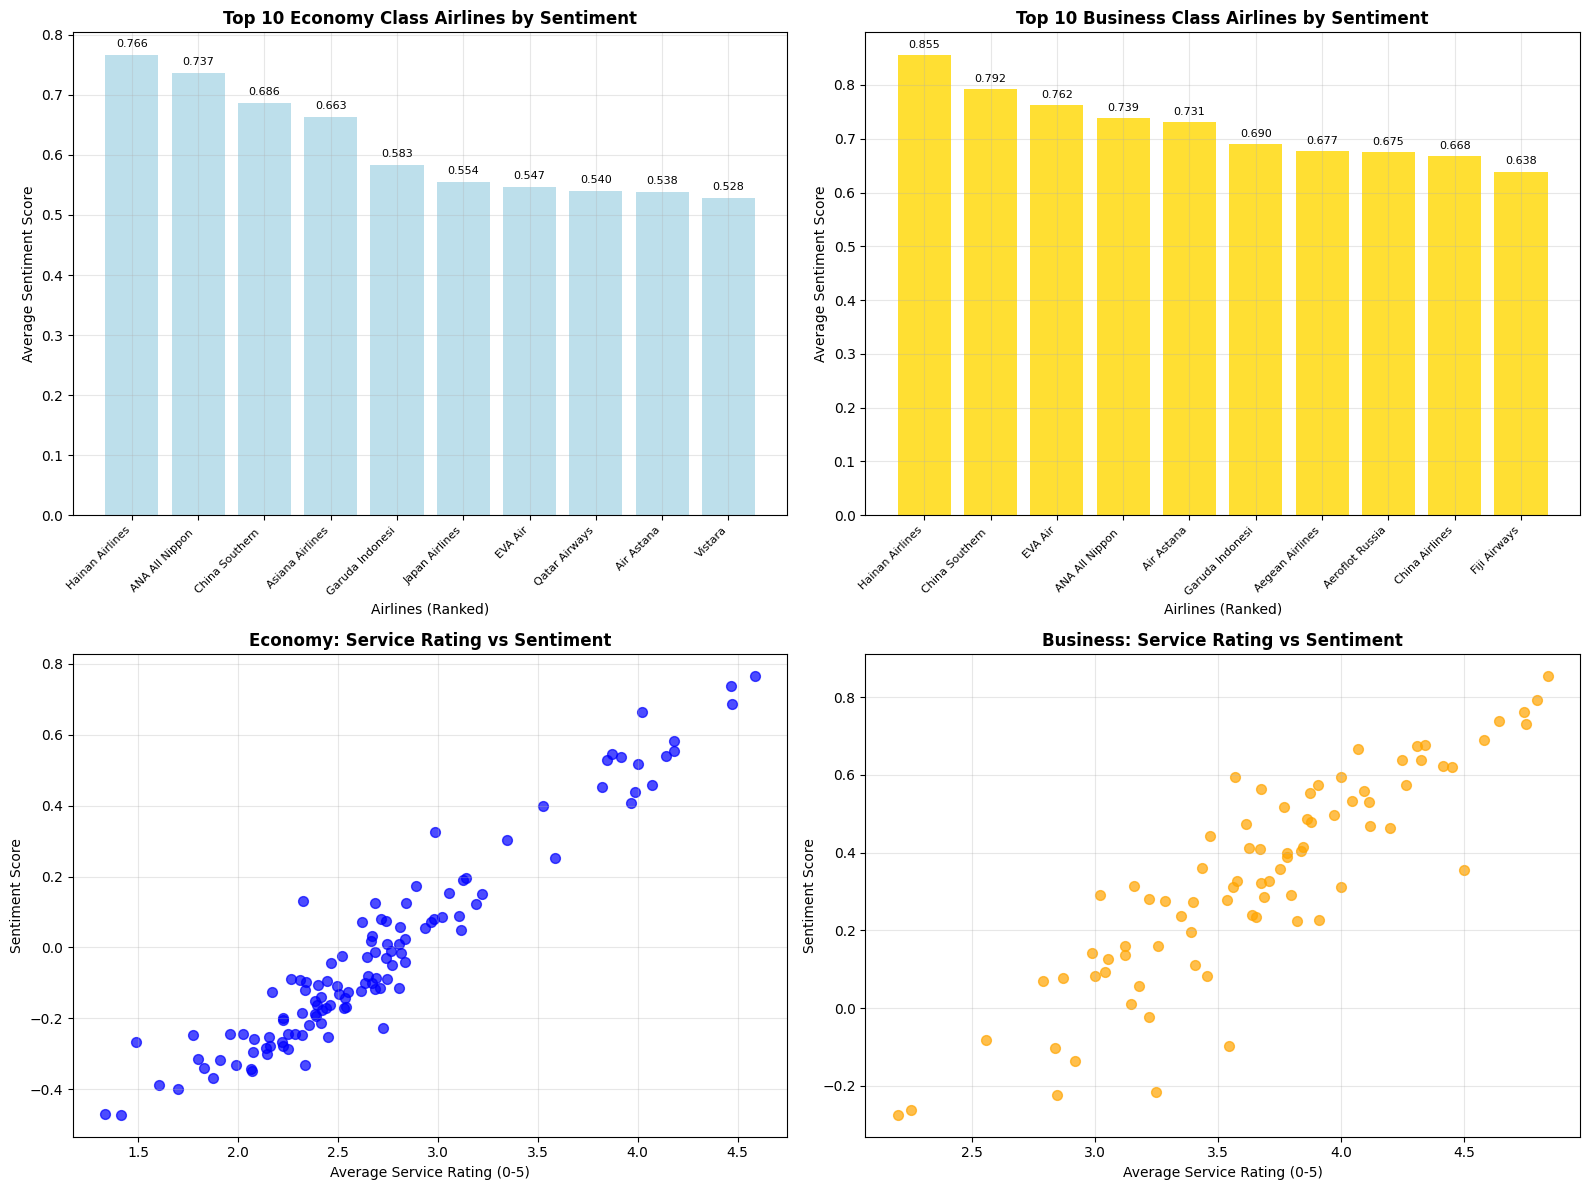

In [36]:
# Create comprehensive visualization comparing cabin types
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 10 Economy Class Airlines by Sentiment
if not economy_analysis.empty:
    top_10_economy = economy_analysis.head(10)
    bars1 = axes[0,0].bar(range(len(top_10_economy)), 
                          top_10_economy['VADER_Mean'],
                          color='lightblue', alpha=0.8)
    
    axes[0,0].set_title('Top 10 Economy Class Airlines by Sentiment', fontweight='bold')
    axes[0,0].set_xlabel('Airlines (Ranked)')
    axes[0,0].set_ylabel('Average Sentiment Score')
    axes[0,0].set_xticks(range(len(top_10_economy)))
    axes[0,0].set_xticklabels([name[:15] for name in top_10_economy['AirlineName']], 
                              rotation=45, ha='right', fontsize=8)
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 2: Top 10 Business Class Airlines by Sentiment
if not business_analysis.empty:
    top_10_business = business_analysis.head(10)
    bars2 = axes[0,1].bar(range(len(top_10_business)), 
                          top_10_business['VADER_Mean'],
                          color='gold', alpha=0.8)
    
    axes[0,1].set_title('Top 10 Business Class Airlines by Sentiment', fontweight='bold')
    axes[0,1].set_xlabel('Airlines (Ranked)')
    axes[0,1].set_ylabel('Average Sentiment Score')
    axes[0,1].set_xticks(range(len(top_10_business)))
    axes[0,1].set_xticklabels([name[:15] for name in top_10_business['AirlineName']], 
                              rotation=45, ha='right', fontsize=8)
    axes[0,1].grid(True, alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 3: Sentiment vs Service Rating Correlation (Economy)
if not economy_analysis.empty:
    axes[1,0].scatter(economy_analysis['Avg_Service_Rating'], 
                      economy_analysis['VADER_Mean'],
                      alpha=0.7, c='blue', s=50)
    axes[1,0].set_title('Economy: Service Rating vs Sentiment', fontweight='bold')
    axes[1,0].set_xlabel('Average Service Rating (0-5)')
    axes[1,0].set_ylabel('Sentiment Score')
    axes[1,0].grid(True, alpha=0.3)

# Plot 4: Sentiment vs Service Rating Correlation (Business)
if not business_analysis.empty:
    axes[1,1].scatter(business_analysis['Avg_Service_Rating'], 
                      business_analysis['VADER_Mean'],
                      alpha=0.7, c='orange', s=50)
    axes[1,1].set_title('Business: Service Rating vs Sentiment', fontweight='bold')
    axes[1,1].set_xlabel('Average Service Rating (0-5)')
    axes[1,1].set_ylabel('Sentiment Score')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Hainan Airlines** is received the highest positive sentiment scores for their Economy class and Business Class services. This demonstrates their commitment to provide high quality services to their customers.

>Note:- Sentiment analysis is conducted using TextBlob and VADER and high priority is given for VADER sentiment analysis scores since it's ability to understand informal reviews and comments. In most cases both scores are aligns perfectly. Only consider airlines that receives at least 10 reviews for this analysis.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

In [ ]:
!pip install gensim nltk wordcloud

In [54]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from gensim import corpora
from gensim.models.ldamodel import LdaModel 
from gensim.models import CoherenceModel
from wordcloud import WordCloud
from collections import Counter, defaultdict

# Download ALL required NLTK data with comprehensive coverage
def download_nltk_data():
    """Download all required NLTK data for newer NLTK versions"""
    resources = [
        'punkt',           # Basic tokenizer
        'punkt_tab',       # New tokenizer for NLTK 3.8+
        'stopwords',       # Stop words corpus
        'averaged_perceptron_tagger',      # Basic POS tagger
        'averaged_perceptron_tagger_eng'   # English POS tagger for newer versions
    ]
    
    for resource in resources:
        try:
            nltk.download(resource, quiet=True)
            print(f"Downloaded {resource}")
        except Exception as e:
            print(f"Warning: Could not download {resource}: {e}")
    
    print("NLTK data download completed")

# Download NLTK data
download_nltk_data()

def preprocess_text_for_topic_modeling(text):
    """
    Comprehensive text preprocessing for topic modeling
    """
    if pd.isna(text) or not isinstance(text, str):
        return ""
    
    text = text.lower()
    
    # Remove special characters, keep only alphabetic characters and spaces
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def extract_nouns_from_text(text):
    """
    Extract only nouns using POS tagging with robust error handling
    """
    if not text or len(text.strip()) == 0:
        return []
    
    try:
        # Tokenize
        tokens = word_tokenize(text)
        
        # POS tagging to identify nouns
        pos_tags = pos_tag(tokens)
        
        # Extract only nouns (NN, NNS, NNP, NNPS)
        nouns = [word for word, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
        
        # Filter out very short words and common stopwords
        try:
            stop_words = set(stopwords.words('english'))
        except:
            stop_words = set()  # Fallback if stopwords not available
            
        # Additional filtering
        nouns = [noun for noun in nouns 
                if len(noun) > 2 
                and noun not in stop_words 
                and noun.isalpha()]  # Only alphabetic words
        
        return nouns
        
    except Exception as e:
        print(f"Error processing text: {str(e)[:100]}...")
        return []

def perform_topic_modeling(noun_documents, num_topics=5):
    """
    Perform LDA topic modeling on processed documents
    """
    if not noun_documents:
        print("No documents available for topic modeling")
        return None, None, None
    
    # Create dictionary and corpus
    dictionary = corpora.Dictionary(noun_documents)
    
    # Filter extremes: remove words that appear in less than 2 documents or more than 50% of documents
    dictionary.filter_extremes(no_below=2, no_above=0.5)
    
    # Create corpus
    corpus = [dictionary.doc2bow(doc) for doc in noun_documents]
    
    if not corpus:
        print("Empty corpus after filtering")
        return None, None, None
    
    # FIXED: Use LdaModel instead of LdaMulticore for alpha='auto' support
    print(f"Training LDA model with {num_topics} topics using LdaModel...")
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',  # This works with LdaModel but not LdaMulticore
        per_word_topics=True
    )
    
    return lda_model, dictionary, corpus

# Main processing pipeline
print("="*60)
print("AIRLINE REVIEW TOPIC MODELING PIPELINE")
print("="*60)

print(f"Total reviews in dataset: {len(sample_df):,}")

# Filter out very short reviews
review_texts = sample_df['Review'].dropna()
review_texts = review_texts[review_texts.str.len() > 30]
print(f"Reviews after filtering: {len(review_texts):,}")

# Preprocess all texts
print("Preprocessing texts...")
preprocessed_texts = review_texts.apply(preprocess_text_for_topic_modeling)

# Extract nouns from each review
print("Extracting nouns using POS tagging...")
noun_documents = []

for i, text in enumerate(preprocessed_texts):
    nouns = extract_nouns_from_text(text)
    if len(nouns) > 2:  # Only keep documents with at least 3 nouns
        noun_documents.append(nouns)
    
    if (i + 1) % 10000 == 0 or i == len(preprocessed_texts) - 1:
        print(f"Processed {i+1}/{len(preprocessed_texts)} documents...")

print(f"Documents with nouns extracted: {len(noun_documents):,}")

if noun_documents:
    # Display sample of extracted nouns
    print(f"\nSample nouns from first document: {noun_documents[0][:10]}")
    
    # Perform topic modeling
    lda_model, dictionary, corpus = perform_topic_modeling(noun_documents, num_topics=3)
    
    if lda_model:
        print(f"\nDictionary size: {len(dictionary)}")
        print(f"Corpus size: {len(corpus)}")
        
        # Display topics
        print("\n" + "="*50)
        print("DISCOVERED TOPICS")
        print("="*50)
        
        for idx, topic in lda_model.print_topics(-1):
            print(f"Topic {idx}: {topic}")
            
        # Calculate coherence score
        try:
            coherence_model_lda = CoherenceModel(
                model=lda_model, 
                texts=noun_documents, 
                dictionary=dictionary, 
                coherence='c_v'
            )
            coherence_lda = coherence_model_lda.get_coherence()
            print(f"\nCoherence Score: {coherence_lda:.4f}")
        except Exception as e:
            print(f"Could not calculate coherence score: {e}")
            
else:
    print("No valid documents found for topic modeling")

print("\n" + "="*60)
print("PROCESSING COMPLETE")
print("="*60)


Downloaded punkt
Downloaded punkt_tab
Downloaded stopwords
Downloaded averaged_perceptron_tagger
Downloaded averaged_perceptron_tagger_eng
NLTK data download completed
AIRLINE REVIEW TOPIC MODELING PIPELINE
Total reviews in dataset: 50,000
Reviews after filtering: 49,999
Preprocessing texts...
Extracting nouns using POS tagging...
Processed 10000/49999 documents...
Processed 20000/49999 documents...
Processed 30000/49999 documents...
Processed 40000/49999 documents...
Processed 49999/49999 documents...
Documents with nouns extracted: 49,997

Sample nouns from first document: ['indianapolis', 'horror', 'show', 'flight', 'years', 'plane', 'vegas', 'time', 'return', 'vegas']
Training LDA model with 3 topics using LdaModel...

Dictionary size: 13272
Corpus size: 49997

DISCOVERED TOPICS
Topic 0: 0.031*"customer" + 0.028*"service" + 0.023*"airline" + 0.020*"ticket" + 0.014*"flights" + 0.014*"days" + 0.014*"day" + 0.013*"refund" + 0.013*"airlines" + 0.013*"phone"
Topic 1: 0.027*"food" + 0.02

By using the above LDA topic modeling analysis with 3 topics we can interpret main concerns and interests of passengers as below.

**Topic 0 - Customer service and support related issues**

The keywords identified related to this topic are customer, serivce, airline, ticket, refund, phone, flights, days and day. By analysing these keywords we can infer that this topic represents passenger concerns about customer service quality, flight booking issues, refund process, and customer support services. Many passengers are concerned about getting help when they face several problems like ticket booking issues, and refund issues.

**Topic 1 - In-flight experience and service quality**

The keywords identified related to this topic are food, seat, service, seats, crew, class, cabin, business, time, and staff. This topic represents passenger interests and expectations about seat comfort, food quality, service quality of flight crew, and cabin class quality. Therefore, many passengers prioritize in-flight experiance when travaling with an airline.

**Topic 2 - Operational efficiency and logistics**

The keywords identified related to this topic are time, airport, hours, plane, airline, luggage, staff, hour, gate and bag. This topic represents passenger concerns about operational efficiency, baggage handling and reliablily of airlines. Many passengers have concerns about flight delays, and how airline handle their baggages.

In [56]:
def preprocess_reviews(text):
    """Simple preprocessing function"""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters
    tokens = word_tokenize(text)
    
    # POS tagging to extract nouns only
    tagged = pos_tag(tokens)
    nouns = [word for word, pos in tagged if pos.startswith('NN')]
    
    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    filtered_nouns = [word for word in nouns if word not in stop_words and len(word) > 2]
    
    return filtered_nouns

# Step 1: Identify top 3 and bottom 3 airlines
airline_ratings = sample_df.groupby('AirlineName')['OverallScore'].mean().sort_values(ascending=False)

top_3_airlines = airline_ratings.head(3).index.tolist()
bottom_3_airlines = airline_ratings.tail(3).index.tolist()

print("Top 3 Airlines:", top_3_airlines)
print("Bottom 3 Airlines:", bottom_3_airlines)

# Step 2: Filter reviews for each group
top_3_reviews = sample_df[sample_df['AirlineName'].isin(top_3_airlines)]['Review'].dropna()
bottom_3_reviews = sample_df[sample_df['AirlineName'].isin(bottom_3_airlines)]['Review'].dropna()

print(f"\nTop 3 airlines reviews: {len(top_3_reviews):,}")
print(f"Bottom 3 airlines reviews: {len(bottom_3_reviews):,}")

# Step 3: Preprocess text data
top_3_processed = [preprocess_reviews(review) for review in top_3_reviews]
bottom_3_processed = [preprocess_reviews(review) for review in bottom_3_reviews]

# Remove empty documents
top_3_processed = [doc for doc in top_3_processed if len(doc) > 2]
bottom_3_processed = [doc for doc in bottom_3_processed if len(doc) > 2]

# Step 4: Create dictionaries and corpus
top_3_dictionary = corpora.Dictionary(top_3_processed)
top_3_corpus = [top_3_dictionary.doc2bow(text) for text in top_3_processed]

bottom_3_dictionary = corpora.Dictionary(bottom_3_processed)
bottom_3_corpus = [bottom_3_dictionary.doc2bow(text) for text in bottom_3_processed]

# Step 5: Train LDA models with 3 topics each
lda_top_3 = LdaModel(
    corpus=top_3_corpus,
    id2word=top_3_dictionary,
    num_topics=3,
    passes=10,
    random_state=42
)

lda_bottom_3 = LdaModel(
    corpus=bottom_3_corpus,
    id2word=bottom_3_dictionary,
    num_topics=3,
    passes=10,
    random_state=42
)

# Step 6: Display results
print("\n" + "="*60)
print("TOPICS FOR TOP 3 AIRLINES")
print("="*60)
for i, topic in lda_top_3.print_topics(num_words=8):
    print(f"Topic {i+1}: {topic}")

print("\n" + "="*60)
print("TOPICS FOR BOTTOM 3 AIRLINES")
print("="*60)
for i, topic in lda_bottom_3.print_topics(num_words=8):
    print(f"Topic {i+1}: {topic}")

# Step 7: Interpret topics (simple keyword extraction)
def get_topic_keywords(lda_model, num_words=5):
    """Extract clean keywords from topics"""
    topics = []
    for i in range(lda_model.num_topics):
        topic_words = [word for word, prob in lda_model.show_topic(i, num_words)]
        topics.append(topic_words)
    return topics

top_3_keywords = get_topic_keywords(lda_top_3)
bottom_3_keywords = get_topic_keywords(lda_bottom_3)

Top 3 Airlines: ['Hainan Airlines', 'ANA All Nippon Airways', 'China Southern Airlines']
Bottom 3 Airlines: ['Volaris', 'Frontier Airlines', 'VivaAerobús']

Top 3 airlines reviews: 1,368
Bottom 3 airlines reviews: 2,075

TOPICS FOR TOP 3 AIRLINES
Topic 1: 0.070*"flight" + 0.025*"staff" + 0.023*"guangzhou" + 0.020*"service" + 0.018*"airlines" + 0.015*"time" + 0.014*"attendants" + 0.013*"airport"
Topic 2: 0.036*"service" + 0.035*"flight" + 0.033*"food" + 0.027*"crew" + 0.025*"airlines" + 0.024*"cabin" + 0.023*"guangzhou" + 0.020*"time"
Topic 3: 0.055*"flight" + 0.020*"service" + 0.017*"china" + 0.016*"guangzhou" + 0.015*"seat" + 0.015*"time" + 0.015*"staff" + 0.012*"food"

TOPICS FOR BOTTOM 3 AIRLINES
Topic 1: 0.082*"flight" + 0.026*"airline" + 0.018*"time" + 0.018*"airport" + 0.018*"hours" + 0.017*"service" + 0.016*"customer" + 0.013*"day"
Topic 2: 0.043*"flight" + 0.031*"airline" + 0.025*"bag" + 0.023*"seat" + 0.021*"plane" + 0.019*"seats" + 0.011*"time" + 0.011*"airlines"
Topic 3: 0.0

Based on the overall rating Hainan Airlines, ANA All Nippon Airways, and China Southern Airlines identified as the top 3 airlines and Volaris, Frontier Airlines, and VivaAerobus identified as the bottom 3 airlines.

Following are the main concerns and interests of passengers flying on top three airlines.
* In-flight and ground staff service quality and airport operations quality.
* In-flight service quality of food, staff and passengers also value cabin experience.
* Many passengers are concern about have comfort travel without any time delays.

Following are the main concerns and interests of passengers flying on bottom three airlines.
* Many passengers are concern about operational delays and reliability.
* They concern about basic service issues like baggage handling and seating issues.
* Many passengers discuss about cost related issues such as ticketing fees, additianl prices and customer service.

From the above analysis we can identify that top three airlines always trying to offer premium service while maintaining their brand reputation. They are able to charge higher prices from customers and this supports quality infrastructure building. On the otherhand bottom three airlines failed to provide basic services upto the standards. Many passengers have conserns about not having expected service for what they pay.

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication


Based on the above analysis airlines can apply few major enhancements to their services to enhance customer experience and satisfaction. There are core service gaps in majority of airlines. They need to focus on staff training programs both in-flight and ground. Sentiment analysis regarding customer reviews shows that many customers expect better quality food and beverages than what they receive. Airlines need to prioritize basic service consistency in economy class and high quality catering, entertainment, and seat comfortability in business class.

To standout among other competitors in this competitive landscape airlines need to continuously track customer feedbacks and make stratigic business decisions to provide highly satisfied and top quality service to their passengers.


### References:

1. Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent Dirichlet allocation. Journal of Machine Learning Research, 3, 993-1022.

2. Samir, H. A. (2023). Sentiment analysis model for Airline customers' feedback using machine learning and deep learning approaches. Journal of Big Data, 10(1), 1-13.

3. Farzadnia, S., & Gholampour, I. (2022). Identification of opinion trends using sentiment analysis of airlines passengers' reviews. Journal of Air Transport Management, 103, 102246.

4. Patel, A. (2023). Sentiment Analysis of Customer Feedback and Reviews for Airline Services. Procedia Computer Science, 218, 2211-2220.

5. TextBlob Documentation (2024). Natural Language Processing toolkit for Python. Available at: https://textblob.readthedocs.io/

6. Gensim Documentation (2024). Topic modeling for humans. Available at: https://radimrehurek.com/gensim/

7. NLTK Project (2024). Natural Language Toolkit. Available at: https://www.nltk.org/

8. Scikit-learn Documentation (2024). Machine Learning in Python. Available at: https://scikit-learn.org/